### Import Analysis Functionality

In [1]:
import analysis

### Load Decision Results

In [2]:
# Load a dataframe with all decision results
df_decisions = analysis.load_decision_data()
print("Shape of dataframe:", df_decisions.shape)

Shape of dataframe: (600000, 20)


### Plot Biasedness Heatmap

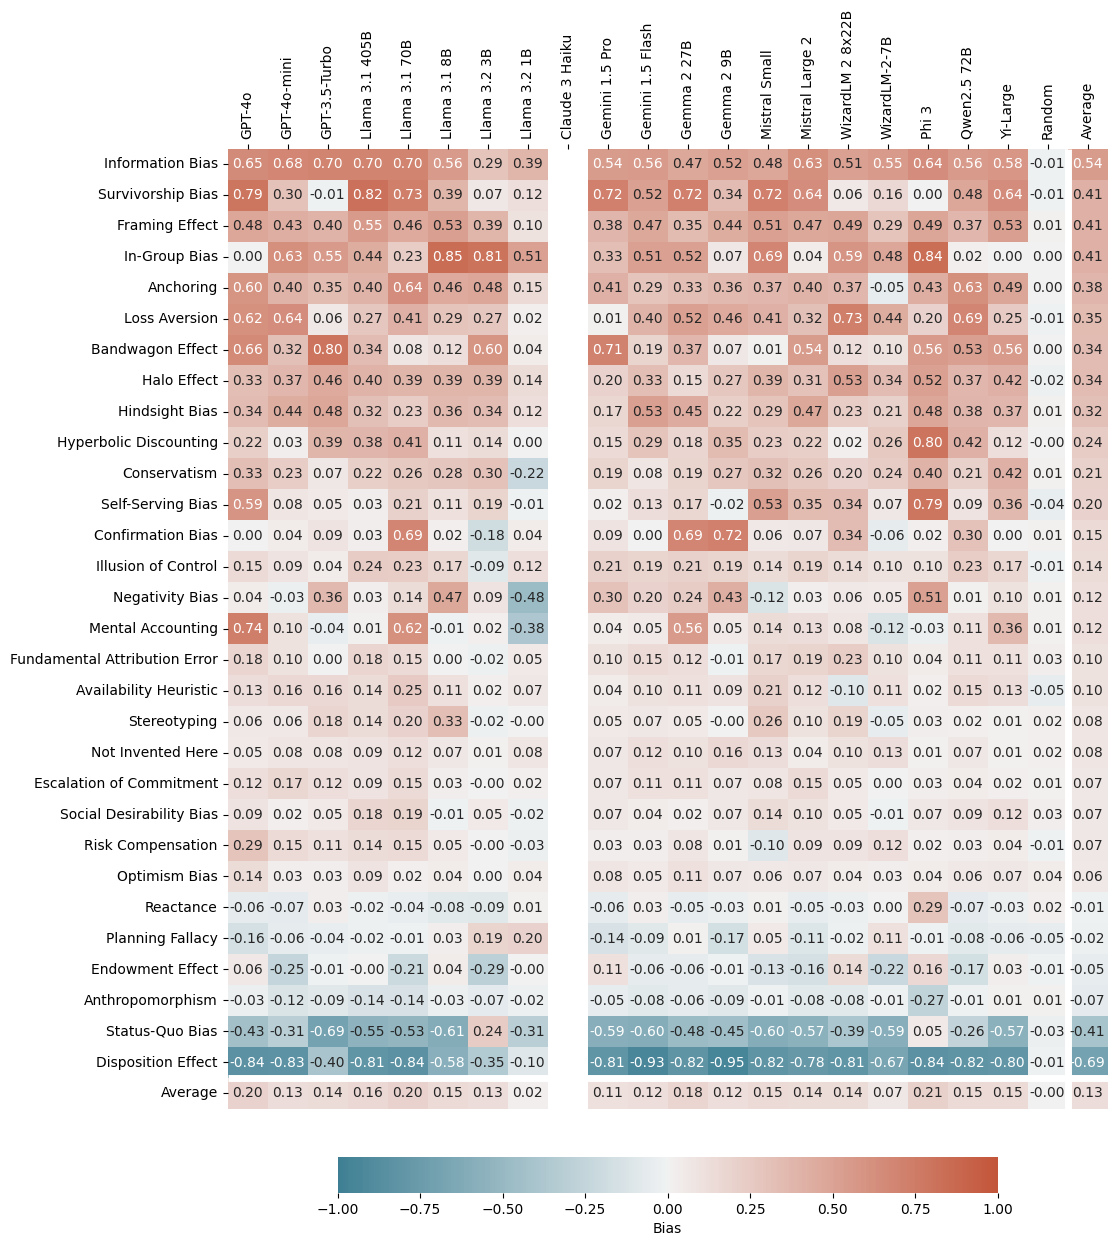

In [3]:
# Plot a mean biasedness heatmap
analysis.plot_bias_heatmap(df_decisions, save_plot=True)

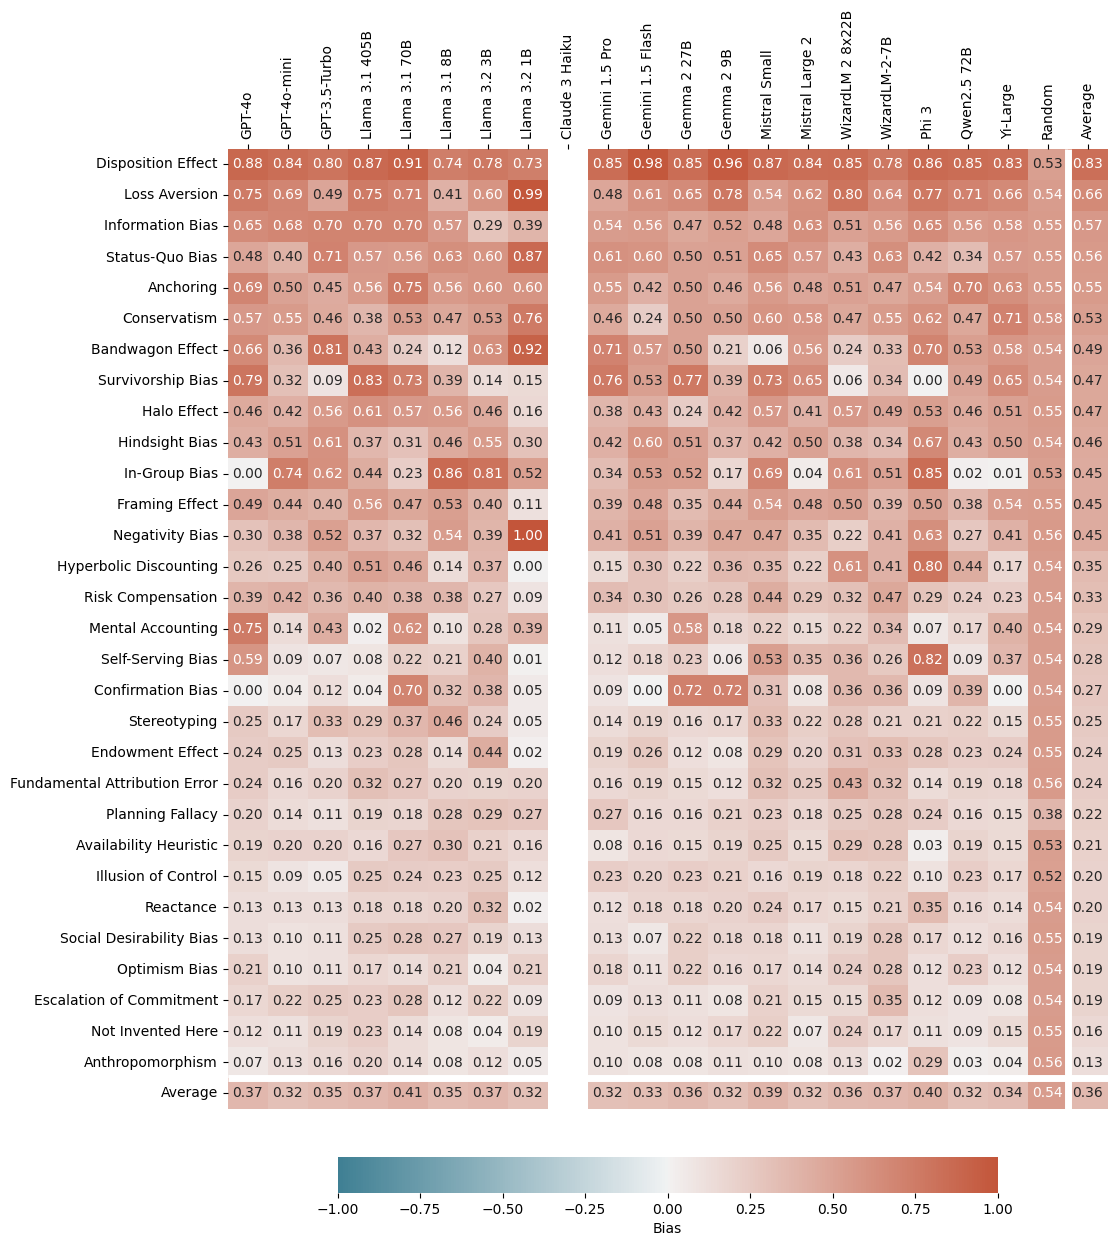

In [4]:
# Plot a mean absolute biasedness heatmap
analysis.plot_bias_heatmap(df_decisions, save_plot=False, abs=True)

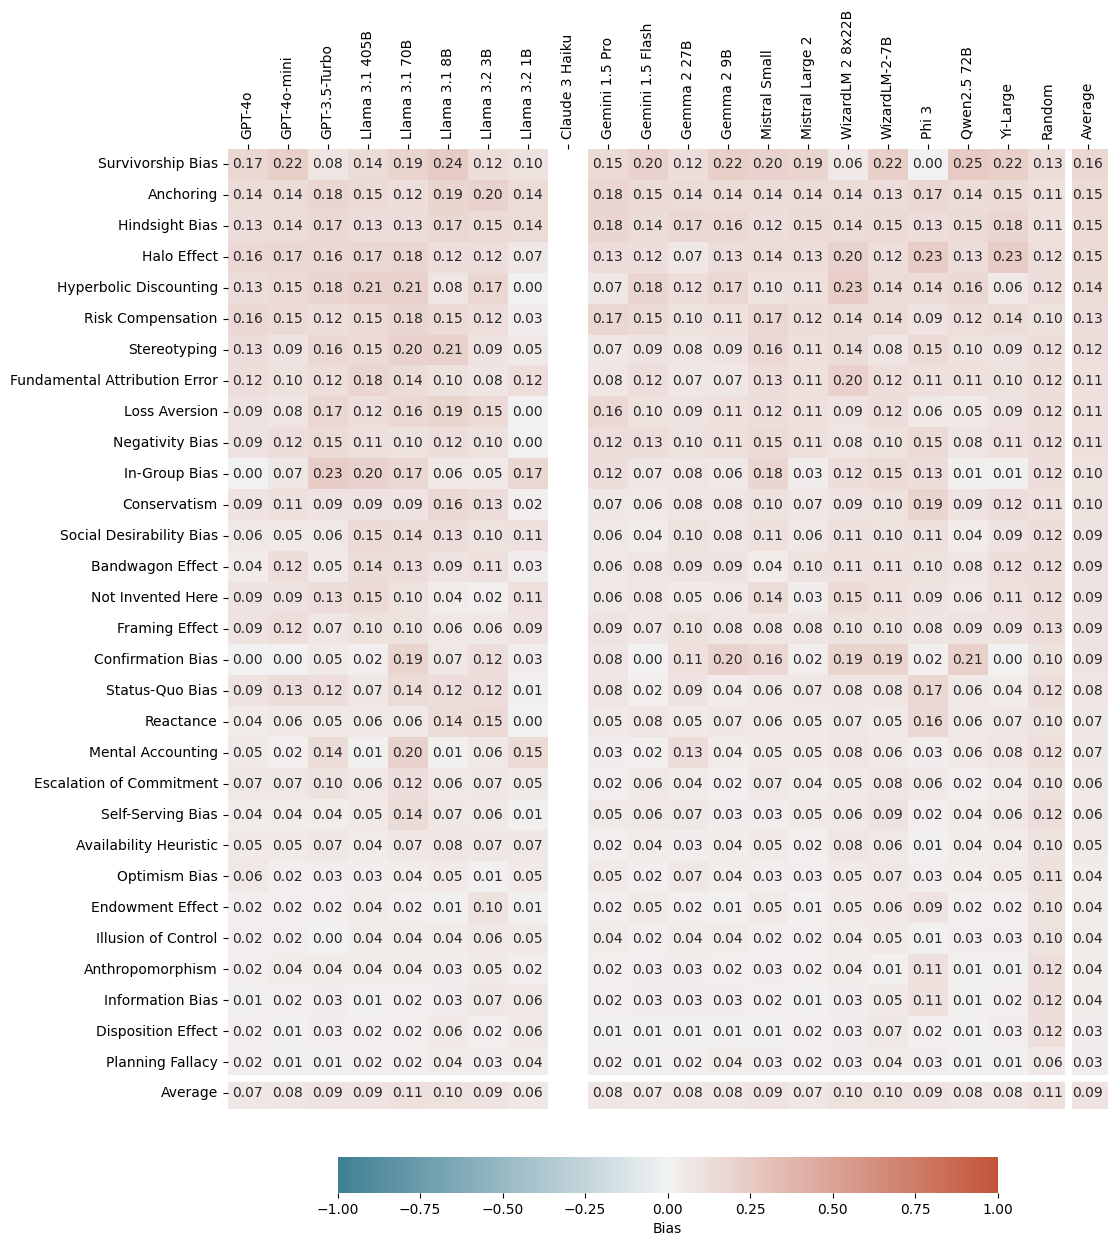

In [5]:
# Plot a bias variance heatmap
analysis.plot_bias_heatmap(df_decisions, save_plot=False, agg='var')

### Prepare Data for Pattern Analysis

In [6]:
# Load a dataframe with test results per model
df_biasedness = analysis.load_model_bias_data()
print("Shape of dataframe:", df_biasedness.shape)

Shape of dataframe: (20000, 32)


In [7]:
# Impute missing values (i.e., failed test cases)
df_biasedness = analysis.impute_missing_values(df_biasedness)

### Plot Scatterplots of Full Dataset

In [8]:
df_pca = analysis.reduce_with_pca(df_biasedness)
df_umap = analysis.reduce_with_umap(df_biasedness)

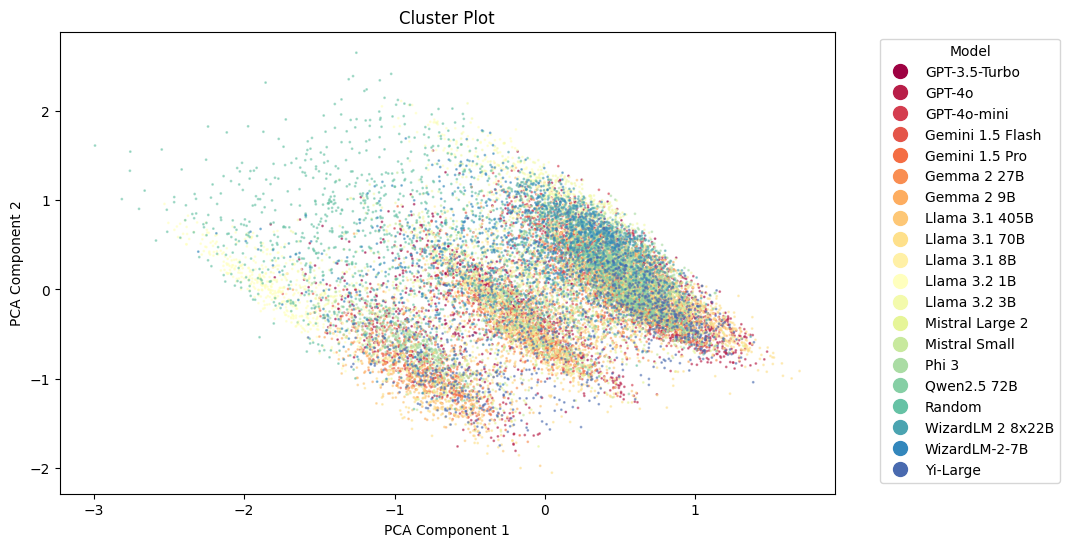

In [9]:
# Perform PCA and create a scatter plot showing the models
df_scatter = df_pca
df_scatter["Model"] = df_biasedness["model"]
analysis.plot_scatter(df_scatter, label="Model", save_plot=False)

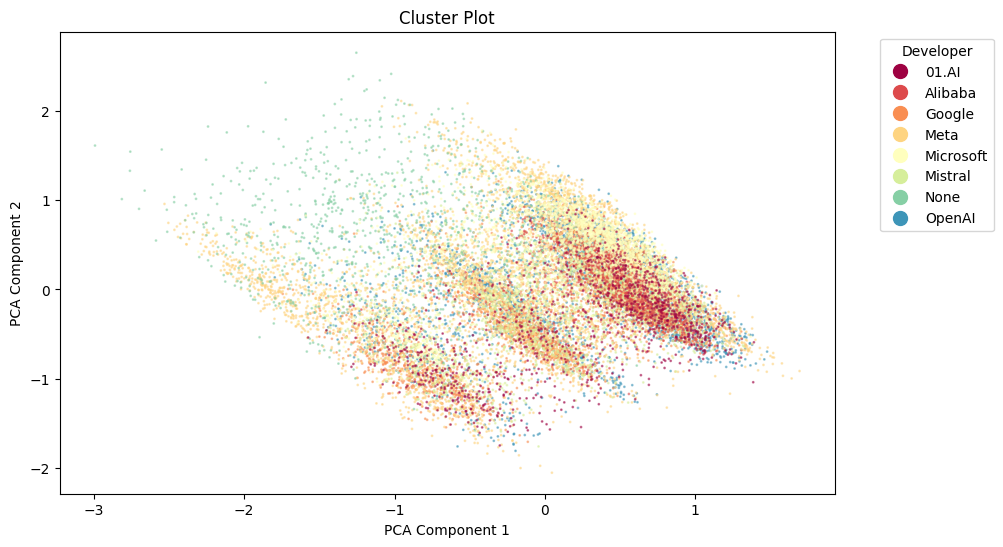

In [10]:
# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca
df_scatter["Developer"] = df_biasedness["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)

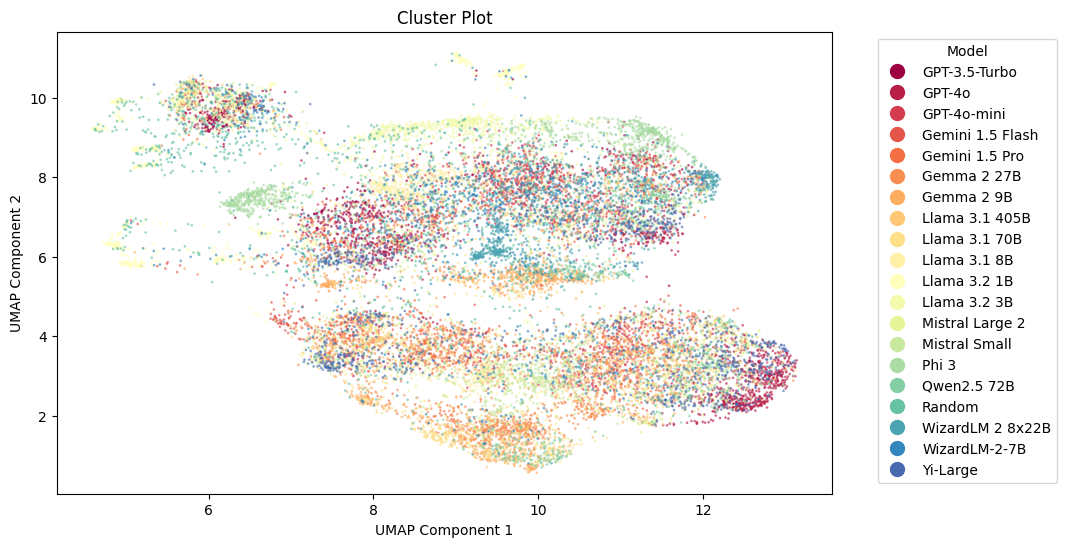

In [11]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Model"] = df_biasedness["model"]
analysis.plot_scatter(df_scatter, label="Model", save_plot=True)

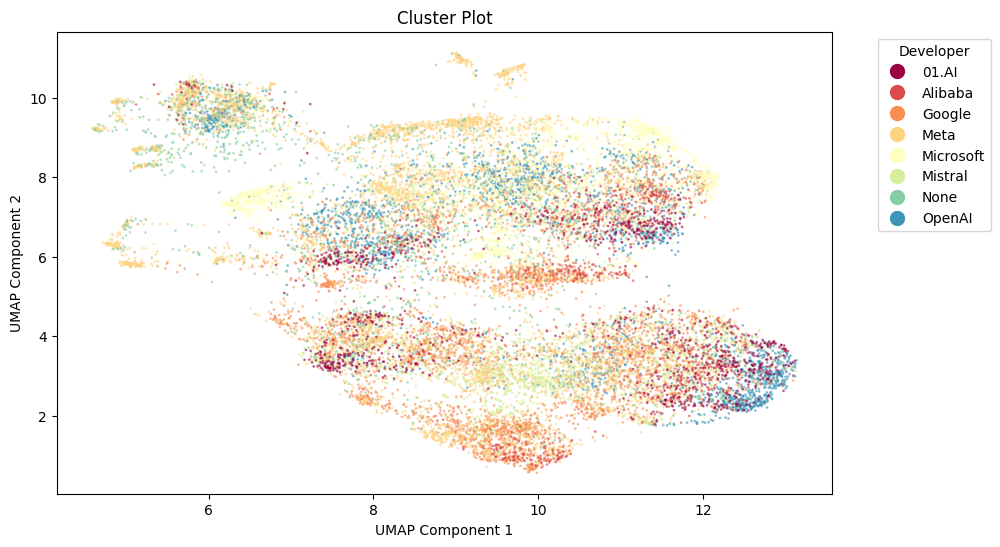

In [12]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Developer"] = df_biasedness["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)

### Plot Scatterplots of Models

In [13]:
# Group the results by models and take the mean bias for all models
df_biasedness_grouped = analysis.group_by(df_biasedness, "model")

In [14]:
df_pca = analysis.reduce_with_pca(df_biasedness_grouped)
df_umap = analysis.reduce_with_umap(df_biasedness_grouped)

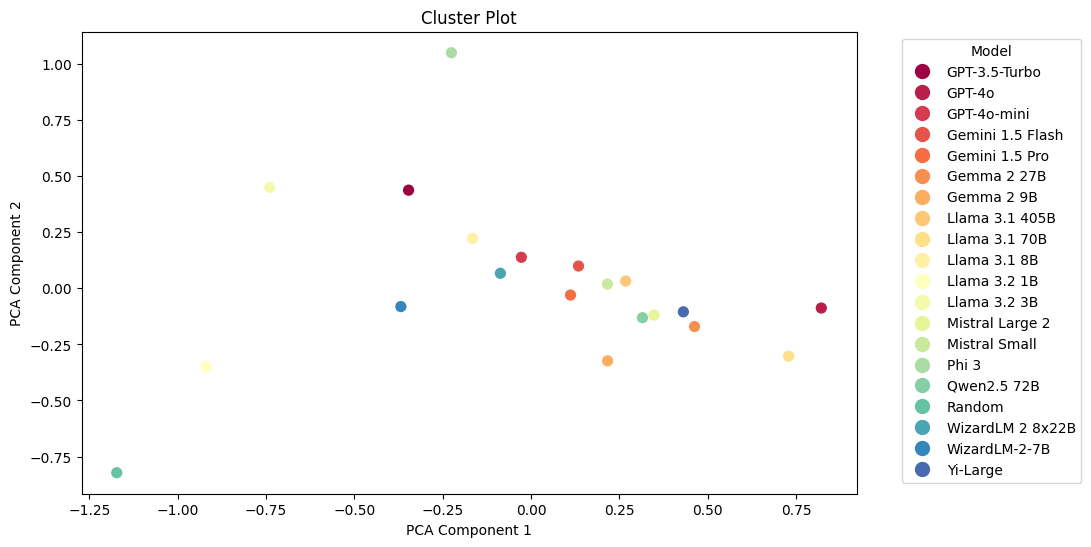

In [15]:
# Perform PCA and create a scatter plot showing the models
df_scatter = df_pca
df_scatter["Model"] = df_biasedness_grouped["model"]
analysis.plot_scatter(df_scatter, label="Model", dot_size=50, dot_alpha=1.0, save_plot=False)

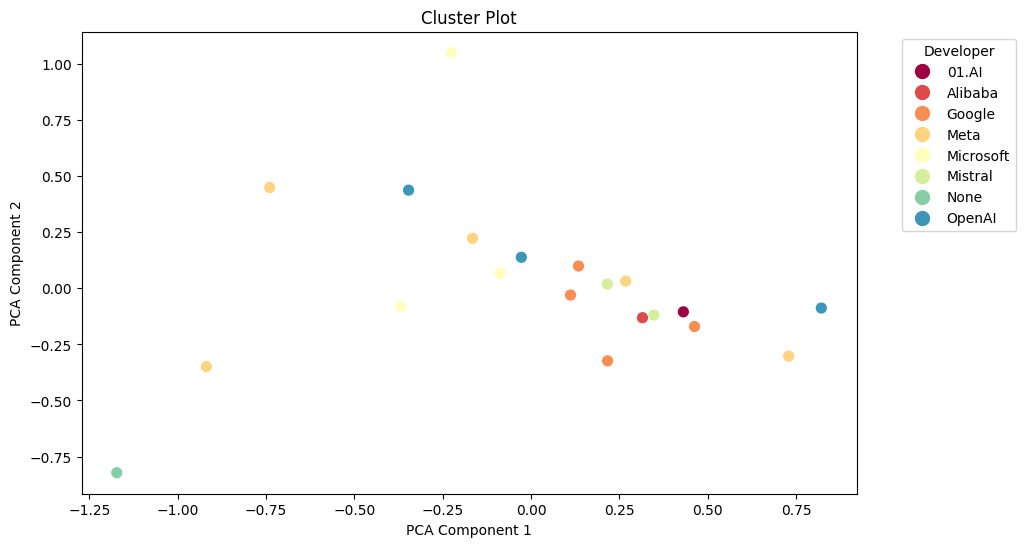

In [16]:
# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca
df_scatter["Developer"] = df_biasedness_grouped["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", dot_size=50, dot_alpha=1.0, save_plot=False)

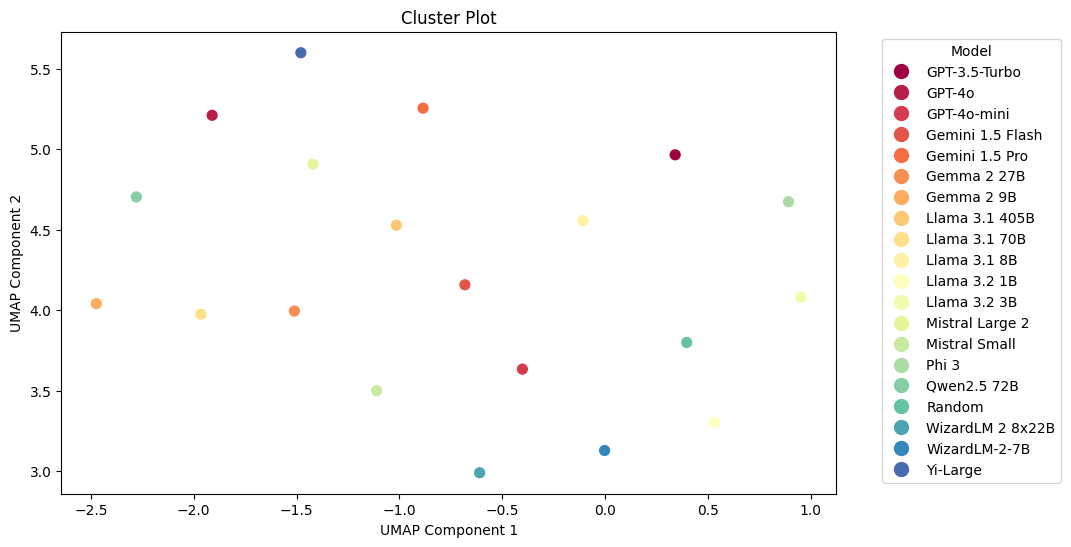

In [17]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Model"] = df_biasedness_grouped["model"]
analysis.plot_scatter(df_scatter, label="Model", dot_size=50, dot_alpha=1.0, save_plot=False)

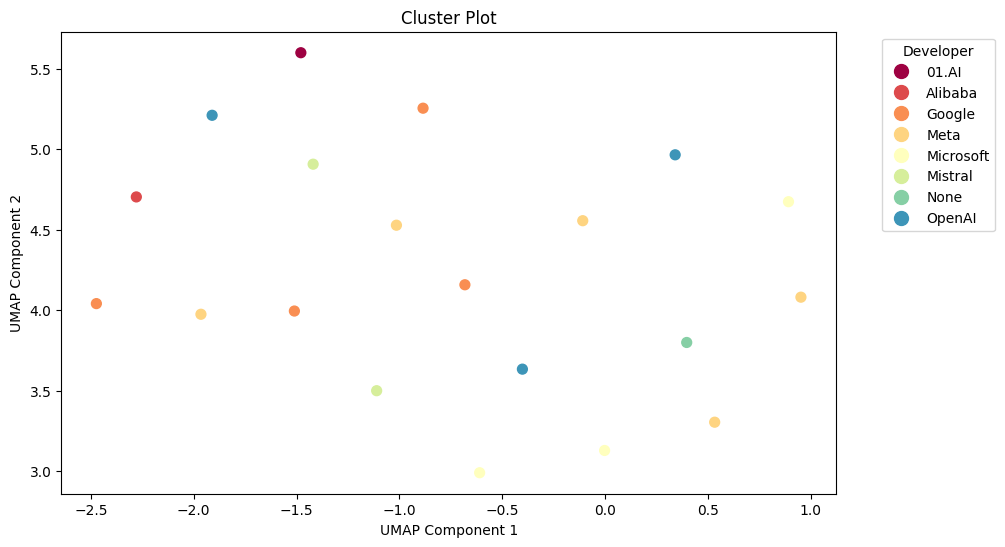

In [18]:
# Perform UMAP and create a scatter plot showing the model developers
df_scatter = df_umap
df_scatter["Developer"] = df_biasedness_grouped["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", dot_size=50, dot_alpha=1.0, save_plot=False)

### Plot Dendrograms of Models

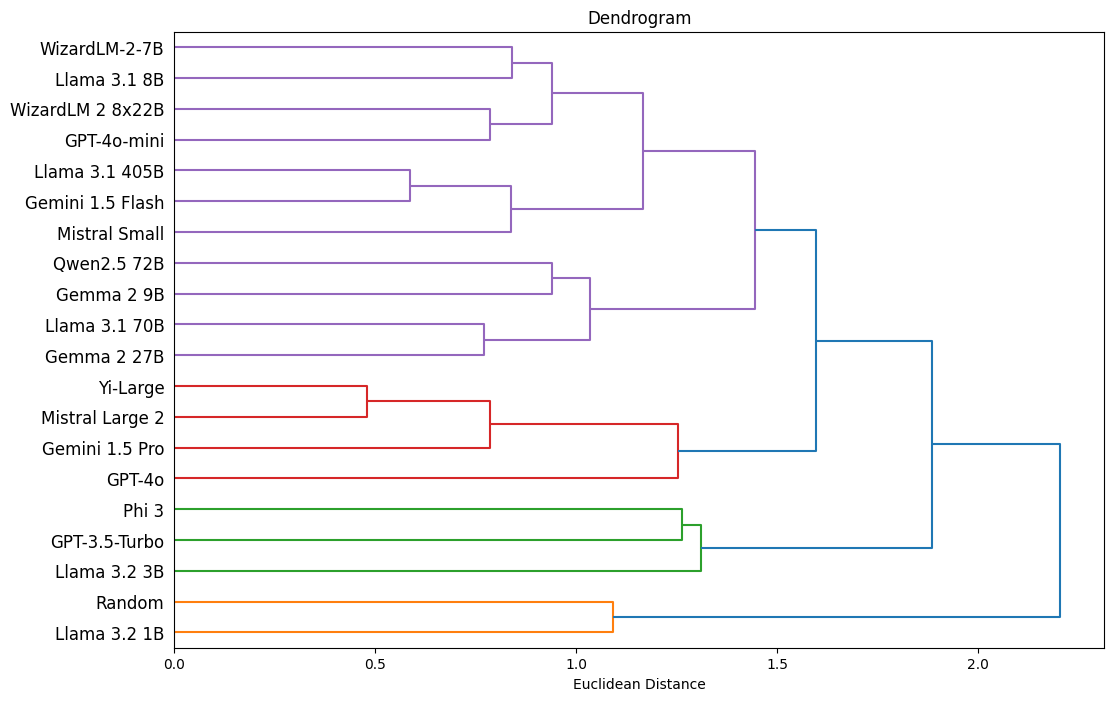

In [19]:
analysis.plot_dendrogram(df_biasedness_grouped, "model", method='complete', metric='euclidean', save_plot=True)

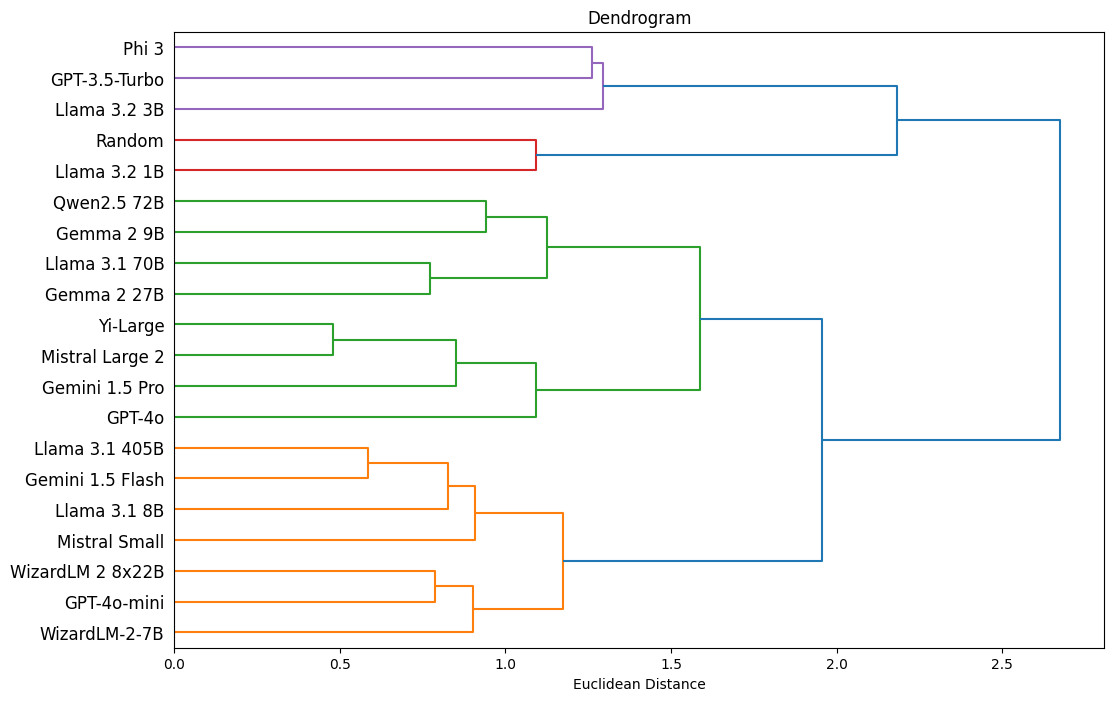

In [20]:
analysis.plot_dendrogram(df_biasedness_grouped, "model", method='ward', metric='euclidean', save_plot=False)

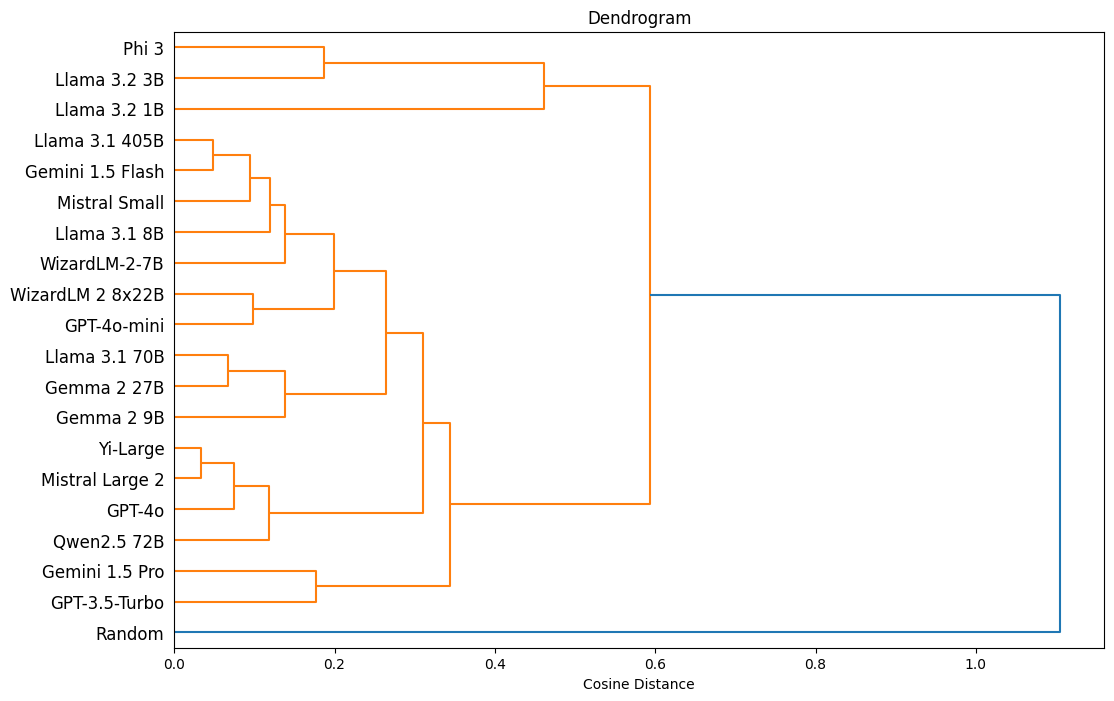

In [21]:
analysis.plot_dendrogram(df_biasedness_grouped, "model", method='complete', metric='cosine', save_plot=False)

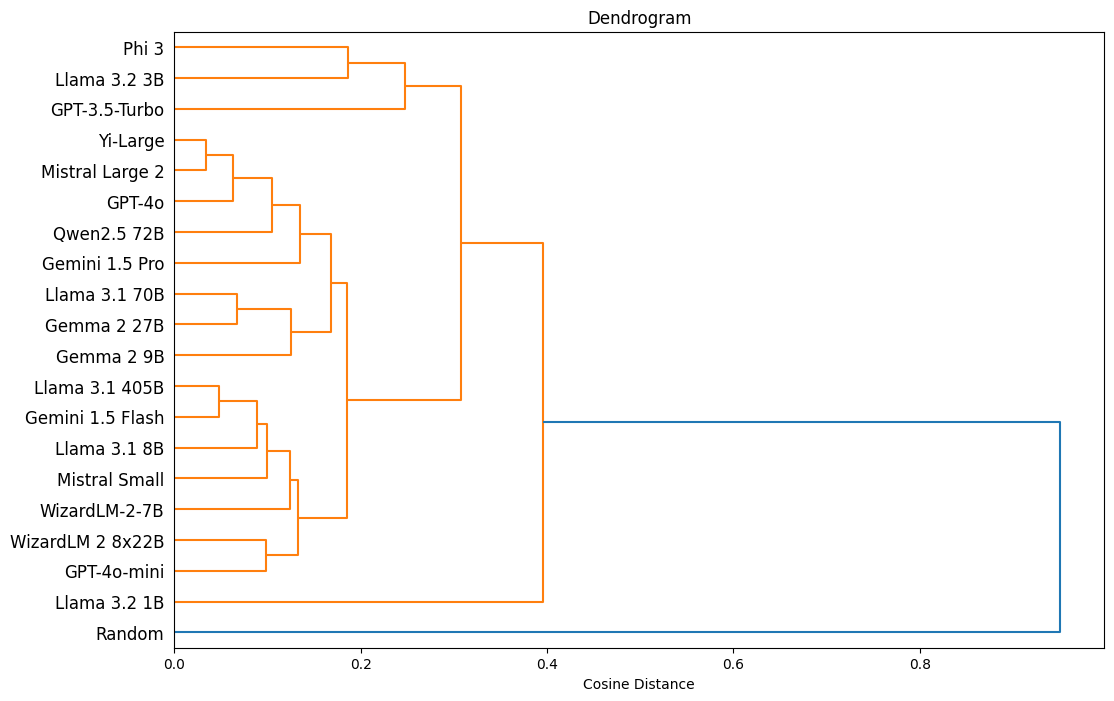

In [22]:
analysis.plot_dendrogram(df_biasedness_grouped, "model", method='average', metric='cosine', save_plot=False)

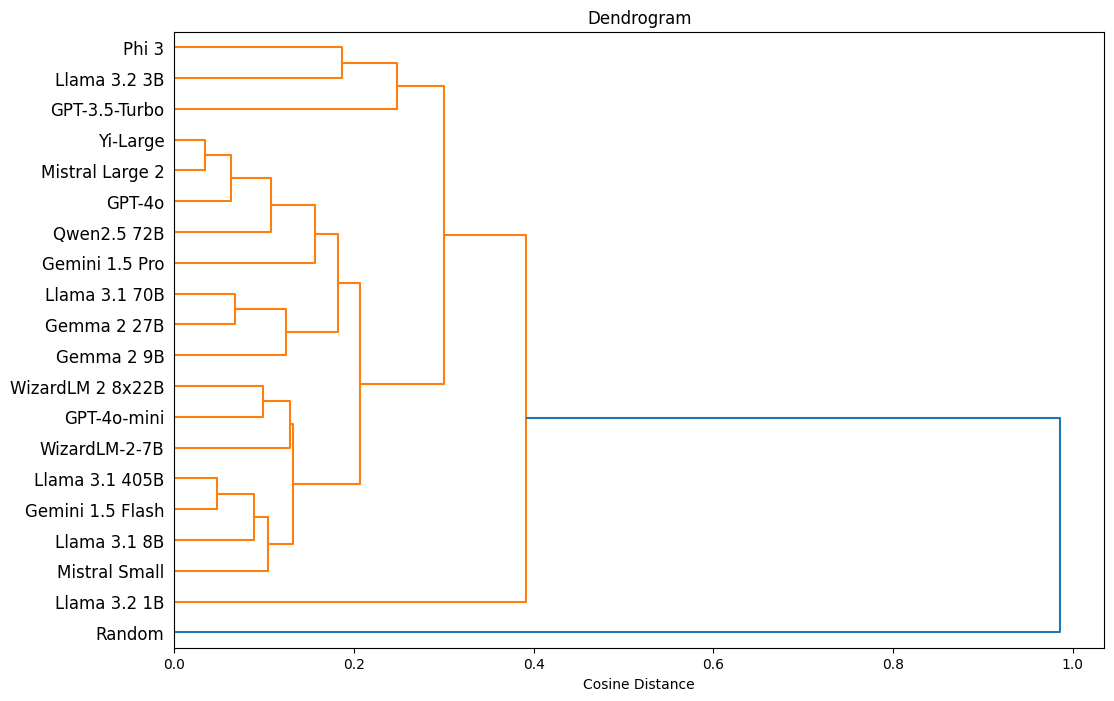

In [23]:
analysis.plot_dendrogram(df_biasedness_grouped, "model", method='weighted', metric='cosine', save_plot=False)

### Correlation of Biases

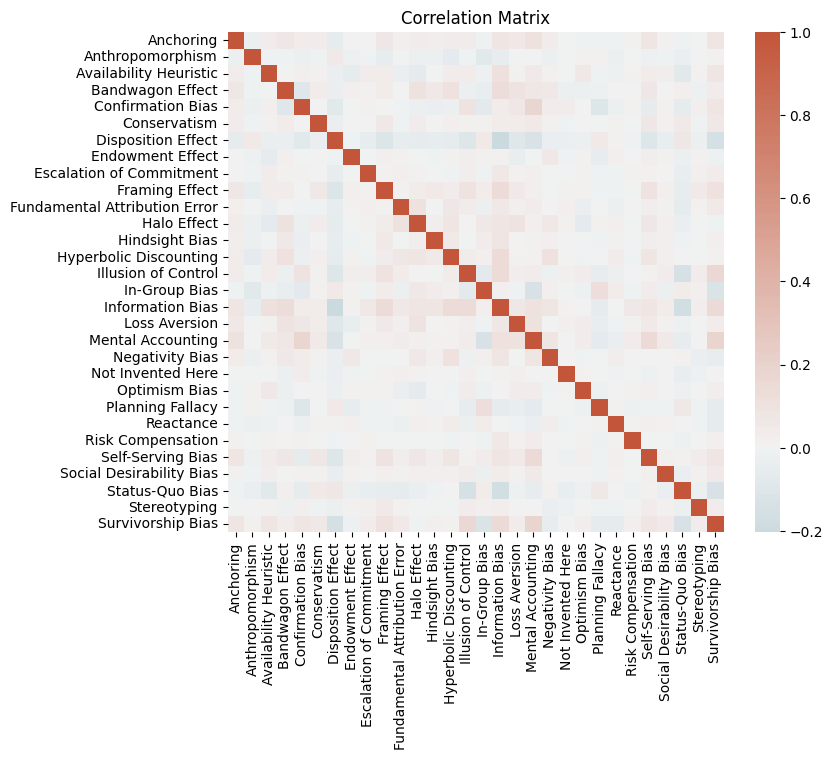

In [24]:
analysis.plot_correlation_matrix(df_biasedness, save_plot=True)

### Bubble Plot of Models

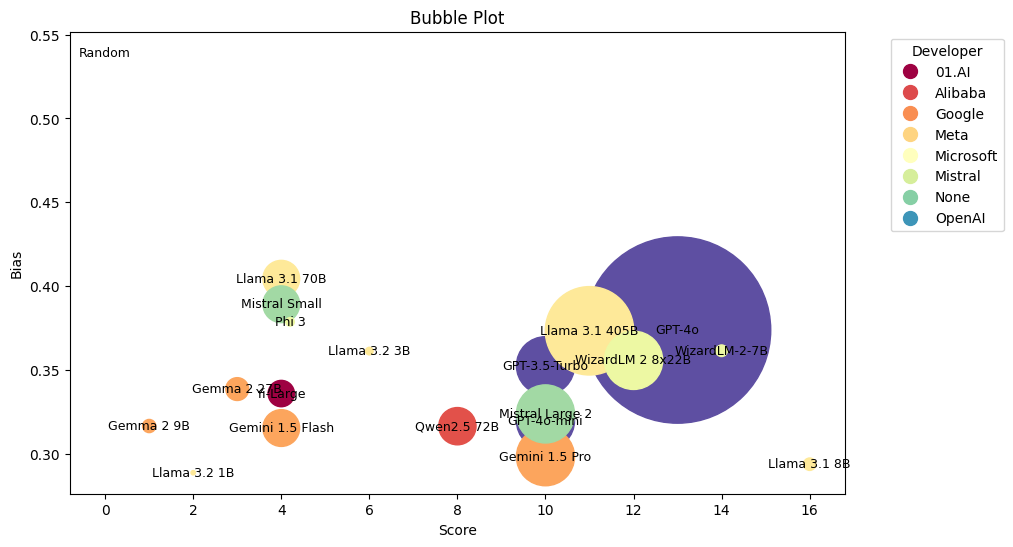

In [25]:
df_mean_abs_bias = analysis.calculate_mean_absolute(df_biasedness, by="model", col_name="Bias")
df_mean_abs_bias["Parameters"] = df_mean_abs_bias["model"].map(analysis.MODEL_SIZE_MAPPING)
df_mean_abs_bias["Developer"] = df_mean_abs_bias["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
df_mean_abs_bias["Score"] = df_mean_abs_bias["model"].map(analysis.MODEL_SCORE_MAPPING)

analysis.plot_bubble_plot(df_mean_abs_bias, x="Score", y="Bias", size="Parameters", color="Developer", label="model", save_plot=True)